Второе задание из задавальника

In [12]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import gaussian_kde

In [ ]:
n = 25
data_sample = np.random.exponential(scale=1.0, size=n)
print(data_sample)

[5.00652911 1.14632811 1.88403547 0.28904311 0.90960775 0.44253771
 0.32128642 0.66046401 1.06096433 0.54088611 0.10651482 0.92383829
 0.23547434 0.1258833  0.39775993 1.02018744 1.40051582 0.53018715
 3.55871118 0.76600866 0.41102149 0.0206451  0.79177035 1.02915554
 1.63995789]


Определить по выборке моду, медиану, размах, оценку коэффициента асимметрии

In [3]:
# мода
mode = stats.mode(data_sample)[0]
print("Мода:", mode)

# медиана
median = np.median(data_sample)
print("Медиана:", median)

# размах
range_value = np.max(data_sample) - np.min(data_sample)
print("Размах:", range_value)

# коэффициент асимметрии
skewness = stats.skew(data_sample)
print("Коэффициент асимметрии:", skewness)

Мода: 0.02064509602451955
Медиана: 0.7660086570471125
Размах: 4.985884012366186
Коэффициент асимметрии: 2.375621532103179


Построить эмпирическую функцию распределения, гистограмму, boxplot

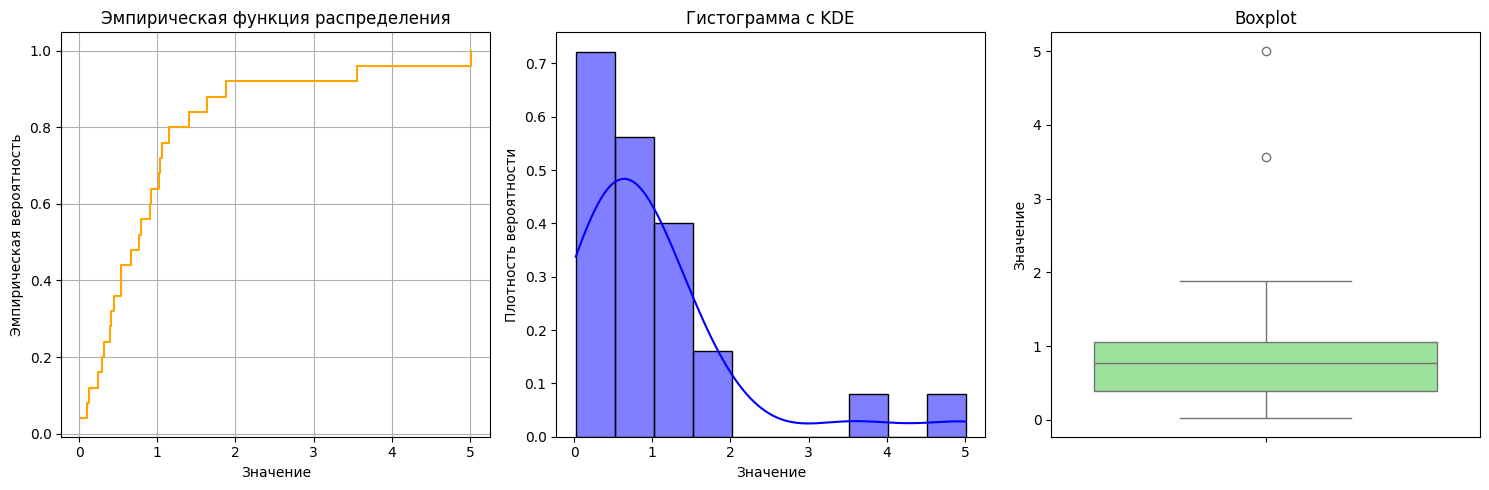

In [4]:
# 1. Эмпирическая функция распределения
plt.figure(figsize=(15, 5))

# Эмпирическая функция распределения
plt.subplot(1, 3, 1)
sorted_sample = np.sort(data_sample)
ecdf = np.arange(1, n + 1) / n
plt.step(sorted_sample, ecdf, label='Эмпирическая функция распределения', color='orange', where='post')
plt.title('Эмпирическая функция распределения')
plt.xlabel('Значение')
plt.ylabel('Эмпирическая вероятность')
plt.grid()

# 2. Гистограмма
plt.subplot(1, 3, 2)
sns.histplot(data_sample, bins=10, kde=True, color='blue', stat='density', edgecolor='black')
plt.title('Гистограмма с KDE')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')

# 3. Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(data=data_sample, color='lightgreen')
plt.title('Boxplot')
plt.ylabel('Значение')

plt.tight_layout()
plt.show()


Сравнение оценки плотности распределения среднего арифметического элементов выборки, полученной с помощью ЦПТ, с бутстраповской оценкой этой плотности.

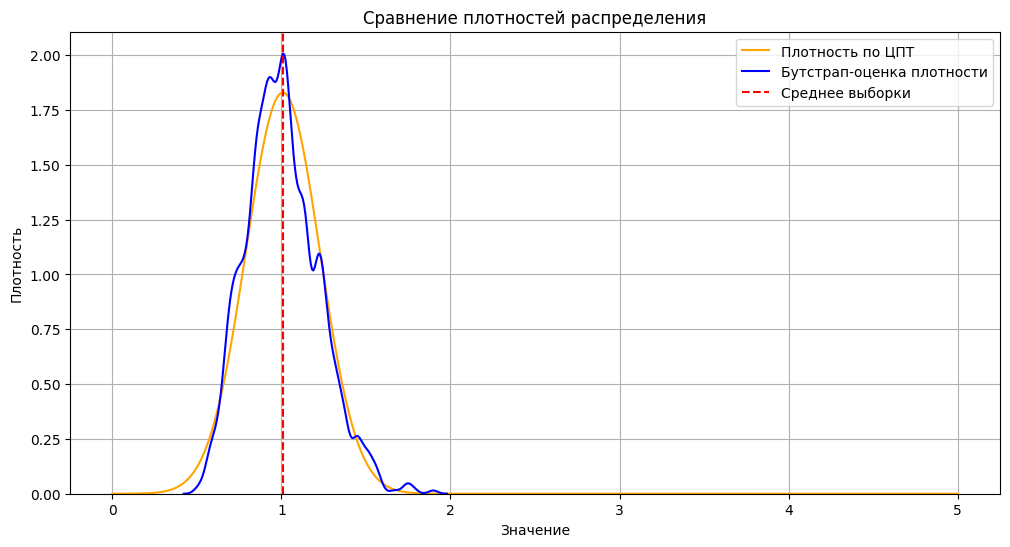

In [5]:
from scipy.stats import norm

num_bootstrap_samples = 1000 

sample_mean = np.mean(data_sample)

bootstrap_means = []
for _ in range(num_bootstrap_samples):
    bootstrap_sample = np.random.choice(data_sample, size=n, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))


plt.figure(figsize=(12, 6))

mu = np.mean(data_sample)
sigma = np.std(data_sample) / np.sqrt(n)

x = np.linspace(0, 5, 1000)
cpt_density = norm.pdf(x, mu, sigma)

plt.plot(x, cpt_density, label='Плотность по ЦПТ', color='orange')

sns.kdeplot(bootstrap_means, label='Бутстрап-оценка плотности', color='blue', bw_adjust=0.5)

plt.axvline(sample_mean, color='red', linestyle='--', label='Среднее выборки')
plt.title('Сравнение плотностей распределения')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.grid()
plt.show()

Бутстраповская оценка плотности распределения коэффициента асимметрии

Вероятность P(γ < 1) ≈ 0.714


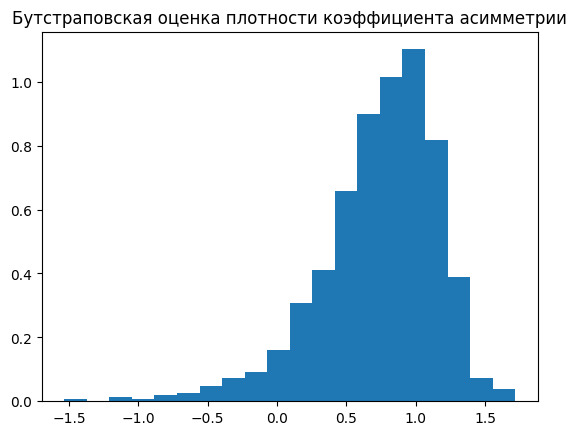

In [14]:
def calc_skewness(data):
    return (3*(np.mean(data) - np.median(data)))/np.std(data)

bootstrap_skew = [calc_skewness(np.random.choice(data_sample, size=25)) for _ in range(1000)]
prob = np.mean(np.array(bootstrap_skew) < 1)
print(f"Вероятность P(γ < 1) ≈ {prob:.3f}")

plt.hist(bootstrap_skew, bins=20, density=True)
plt.title("Бутстраповская оценка плотности коэффициента асимметрии")
plt.show()

Сравнение плотности распределения медианы и бутстраповской оценки этой плотности

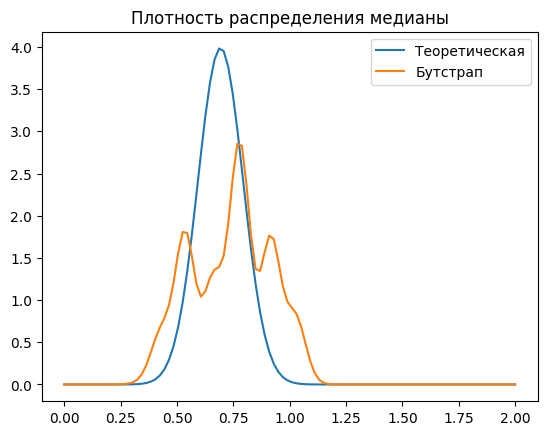

In [13]:
asymptotic_std = 1/(2*np.sqrt(25)*1)
x = np.linspace(0, 2, 100)
plt.plot(x, norm.pdf(x, loc=np.log(2), scale=asymptotic_std), label='Теоретическая')

bootstrap_medians = [np.median(np.random.choice(data_sample, size=25)) for _ in range(1000)]
kde_median = gaussian_kde(bootstrap_medians)
plt.plot(x, kde_median(x), label='Бутстрап')
plt.legend()
plt.title("Плотность распределения медианы")
plt.show()